In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"b131832","key":"890b7881a4d2914f4931d59d550836b4"}'}

In [ ]:
! pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d emmarex/plantdisease

 96% 634M/658M [00:03<00:00, 164MB/s]
100% 658M/658M [00:03<00:00, 186MB/s]


In [ ]:
!ls -lrth

total 658M
drwxr-xr-x 1 root root 4.0K May 17 13:39 sample_data
-rw-r--r-- 1 root root   63 Jun  1 09:48 kaggle.json
-rw-r--r-- 1 root root 658M Jun  1 09:48 plantdisease.zip


In [ ]:
!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [ ]:
!ls -lrth PlantVillage/

total 2.1M
drwxr-xr-x 2 root root 108K Jun  1 09:48 Pepper__bell___Bacterial_spot
drwxr-xr-x 2 root root 140K Jun  1 09:48 Pepper__bell___healthy
drwxr-xr-x 2 root root 104K Jun  1 09:48 Potato___Early_blight
drwxr-xr-x 2 root root  92K Jun  1 09:48 Potato___Late_blight
drwxr-xr-x 2 root root  20K Jun  1 09:48 Potato___healthy
drwxr-xr-x 2 root root 228K Jun  1 09:48 Tomato_Bacterial_spot
drwxr-xr-x 2 root root 104K Jun  1 09:48 Tomato_Early_blight
drwxr-xr-x 2 root root 188K Jun  1 09:48 Tomato_Late_blight
drwxr-xr-x 2 root root 100K Jun  1 09:48 Tomato_Leaf_Mold
drwxr-xr-x 2 root root 168K Jun  1 09:48 Tomato_Septoria_leaf_spot
drwxr-xr-x 2 root root 172K Jun  1 09:48 Tomato_Spider_mites_Two_spotted_spider_mite
drwxr-xr-x 2 root root 144K Jun  1 09:48 Tomato__Target_Spot
drwxr-xr-x 2 root root 308K Jun  1 09:48 Tomato__Tomato_YellowLeaf__Curl_Virus
drwxr-xr-x 2 root root  40K Jun  1 09:48 Tomato__Tomato_mosaic_virus
drwxr-xr-x 2 root root 140K Jun  1 09:48 Tomato_healthy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
imgs_path='PlantVillage/'
img_size=84
batch_size=64


In [ ]:
class_names = os.listdir(imgs_path)
class_names.sort()
print(class_names)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:

def get_data(data_dir):
    img_data = []
    labels=[]
    for label in class_names:
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                img_data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(img_data),np.array(labels)

In [ ]:
img_data,labels = get_data(imgs_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

the shape of input image data is (20638, 84, 84, 3), labels shape is (20638,)


[Text(0, 0, 'Tomato__Tomato_YellowLeaf__Curl_Virus'),
 Text(0, 0, 'Tomato_Early_blight'),
 Text(0, 0, 'Tomato_Bacterial_spot'),
 Text(0, 0, 'Tomato_Septoria_leaf_spot'),
 Text(0, 0, 'Tomato__Target_Spot'),
 Text(0, 0, 'Tomato_Leaf_Mold'),
 Text(0, 0, 'Potato___Late_blight'),
 Text(0, 0, 'Potato___healthy'),
 Text(0, 0, 'Tomato_Spider_mites_Two_spotted_spider_mite'),
 Text(0, 0, 'Pepper__bell___healthy'),
 Text(0, 0, 'Potato___Early_blight'),
 Text(0, 0, 'Tomato_Late_blight'),
 Text(0, 0, 'Pepper__bell___Bacterial_spot'),
 Text(0, 0, 'Tomato_healthy'),
 Text(0, 0, 'Tomato__Tomato_mosaic_virus')]

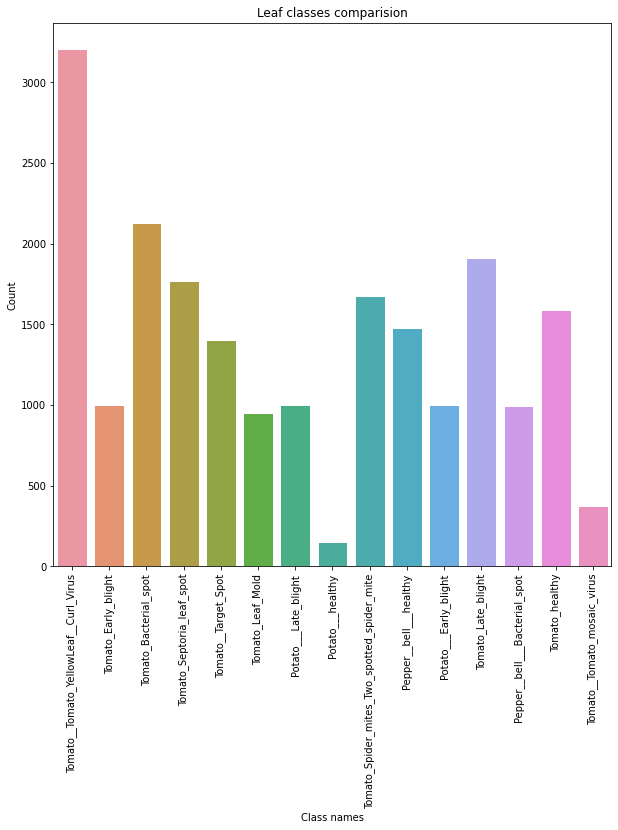

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
sns.set_style('dark')
sns.countplot(labels)
plt.title('Leaf classes comparision')
plt.xlabel('Class names')
plt.ylabel('Count')
ax.set_xticklabels(class_names,rotation=90)

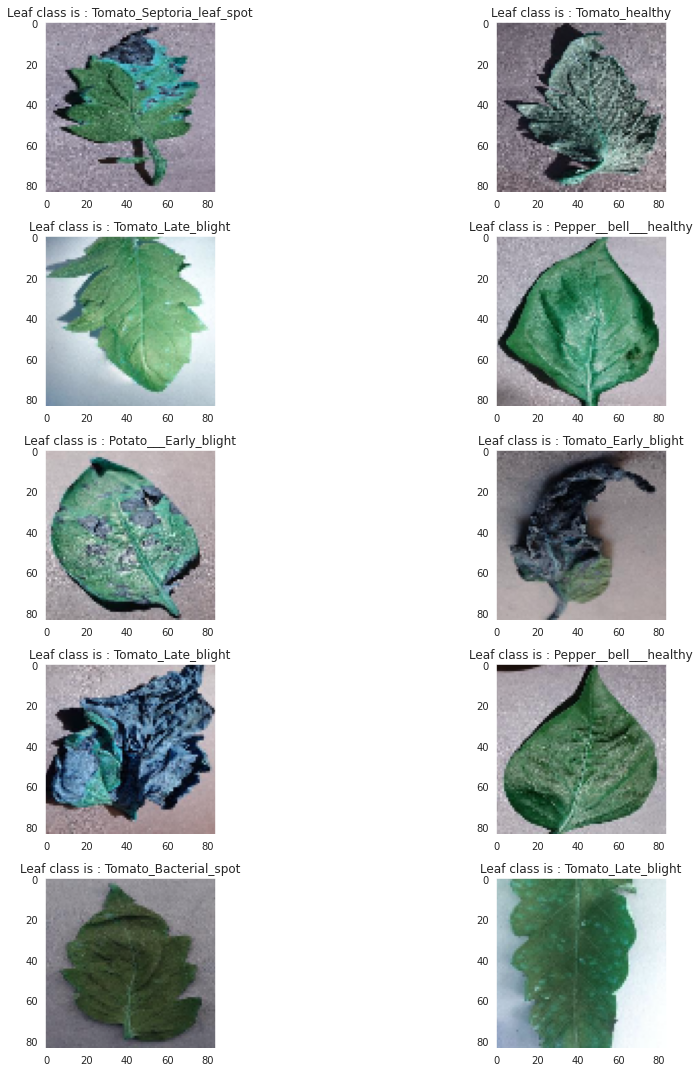

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('Leaf class is : '+str(class_names[labels[l]]))

plt.tight_layout()

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)
img_data[0]

array([[[-0.19215685, -0.20784312, -0.21568626],
        [-0.1607843 , -0.17647058, -0.18431371],
        [-0.12156862, -0.1372549 , -0.14509803],
        ...,
        [-0.20784312, -0.19215685, -0.19215685],
        [-0.24705881, -0.23137254, -0.23137254],
        [-0.25490195, -0.23921567, -0.23921567]],

       [[-0.1607843 , -0.17647058, -0.18431371],
        [-0.14509803, -0.1607843 , -0.16862744],
        [-0.12156862, -0.1372549 , -0.14509803],
        ...,
        [-0.19999999, -0.18431371, -0.18431371],
        [-0.17647058, -0.1607843 , -0.1607843 ],
        [-0.15294117, -0.14509803, -0.14509803]],

       [[-0.18431371, -0.19999999, -0.20784312],
        [-0.1372549 , -0.15294117, -0.1607843 ],
        [-0.09019607, -0.10588235, -0.11372548],
        ...,
        [-0.14509803, -0.12941176, -0.12941176],
        [-0.18431371, -0.16862744, -0.16862744],
        [-0.1607843 , -0.14509803, -0.14509803]],

       ...,

       [[ 0.00392163,  0.02745104,  0.01176476],
        [-0

In [ ]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (16510, 84, 84, 3), X_test shape is (4128, 84, 84, 3)


In [ ]:
del img_data,labels

**Implementing using VGG19**

In [ ]:
from tensorflow.keras.layers import *

from tensorflow.keras.models import *

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(input_shape=(img_size,img_size,3), include_top=False, weights="imagenet")

for layer in vgg.layers[:19]:
        layer.trainable = False

model2=Sequential()
model2.add(vgg)
model2.add(MaxPool2D((2,2),strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(len(class_names),activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 512)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 20,032,079
Trainable params: 4,727,311
Non-trainable params: 15,304,768
_________________________________________________________________


In [ ]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=batch_size)

Epoch 1/10
258/258 [==============================] - 61s 193ms/step - loss: 0.9486 - accuracy: 0.6961 - val_loss: 0.5111 - val_accuracy: 0.8227
Epoch 2/10
258/258 [==============================] - 47s 182ms/step - loss: 0.3989 - accuracy: 0.8617 - val_loss: 0.3940 - val_accuracy: 0.8614
Epoch 3/10
258/258 [==============================] - 47s 182ms/step - loss: 0.2636 - accuracy: 0.9067 - val_loss: 0.3257 - val_accuracy: 0.8912
Epoch 4/10
258/258 [==============================] - 47s 182ms/step - loss: 0.1776 - accuracy: 0.9406 - val_loss: 0.3060 - val_accuracy: 0.8966
Epoch 5/10
258/258 [==============================] - 47s 182ms/step - loss: 0.1348 - accuracy: 0.9523 - val_loss: 0.3154 - val_accuracy: 0.8992
Epoch 6/10
258/258 [==============================] - 47s 182ms/step - loss: 0.0898 - accuracy: 0.9687 - val_loss: 0.3962 - val_accuracy: 0.8898
Epoch 7/10
258/258 [==============================] - 47s 182ms/step - loss: 0.0773 - accuracy: 0.9733 - val_loss: 0.2996 - val_ac

Text(0.5, 1.0, 'val accuracy')

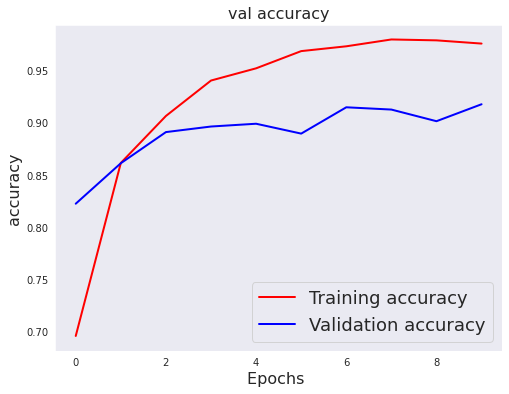

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [ ]:
vgg_acc=model2.evaluate(X_test,y_test)
print('accuracy of the model is ',vgg_acc[1])

129/129 [==============================] - 10s 78ms/step - loss: 0.3051 - accuracy: 0.9179
accuracy of the model is  0.9178779125213623


**For testing the external image**

In [ ]:
from google.colab import files
files.upload()

Saving test2.jpg to test2.jpg


{'test2.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc

(1, 84, 84, 3)

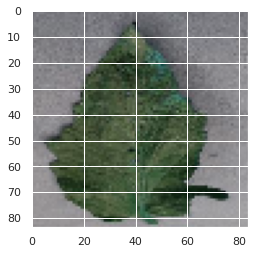

In [ ]:
#image_name='PlantVillage/Potato___healthy/03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG'   # enter image to test
image_name='test2.jpg'
# plt.imshow(plt.imread(image_name))
x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
# from google.colab.patches import cv2_imshow
# cv2_imshow(img_1)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

[[1.7323582e-06 1.3962892e-07 9.9999666e-01 1.4341380e-07 9.5518160e-08
  2.1070292e-09 8.8764743e-13 4.1544050e-13 2.1984232e-09 5.0814375e-10
  6.4046242e-18 1.2423895e-06 3.5610514e-12 5.0795484e-10 3.2601936e-14]]
output is  Tomato_Bacterial_spot


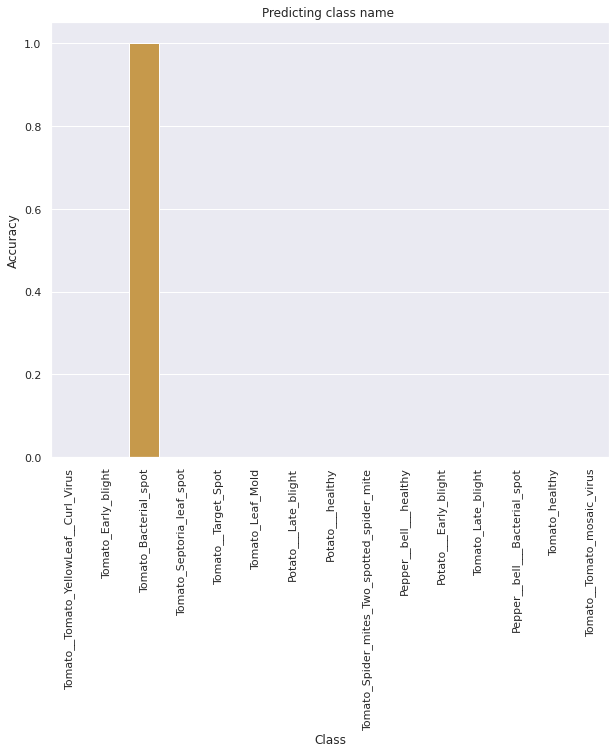

In [ ]:
pred=model2.predict(x1) # for predicting class
print(pred)
# print(pred)
 # predicting probability
labels_pred=np.argmax(pred,axis=1)
# print(labels_pred)
print('output is ',class_names[labels_pred[0]])
# labels=get_labels(labels_pred)
pred_results=pd.DataFrame(data=pred,columns=class_names)
import seaborn as sns
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()